In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.<br><br>
A look at the data<br><br>
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.<br>



In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [5]:
# Check missing values in each column
nba.isnull().sum()
   

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [6]:
#Fill missing values
nba['fg.'].fillna(nba['fg.'].mean(), inplace = True)
nba['x3p.'].fillna(nba['x3p.'].mean(), inplace = True)
nba['x2p.'].fillna(nba['x2p.'].median(), inplace = True)
nba['efg.'].fillna(nba['efg.'].median(), inplace = True)
nba['ft.'].fillna(nba['ft.'].mean(), inplace = True)



In [42]:
# Check whether missing values imputed 
nba.isnull().any().all()

False

In [10]:
nba.columns.values

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [58]:
X = nba.drop(columns = ['pos','player','bref_team_id','pts', 'season', 'season_end'], axis = 1)
y = nba['pts']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)   #use inbuilt class feature_importances of tree based classifiers

[0.04018056 0.04012435 0.03708886 0.04367785 0.05186202 0.04832515
 0.0393297  0.03566929 0.03616687 0.03442472 0.04344461 0.04223569
 0.041113   0.04142321 0.04075955 0.03719709 0.03937779 0.03700741
 0.03842109 0.03814815 0.04066194 0.04115909 0.03600261 0.03882177
 0.03737762]


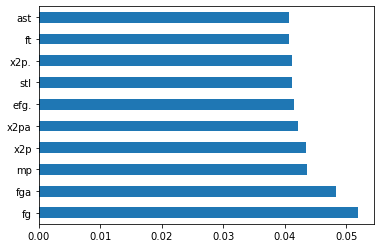

In [59]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [44]:
feat_importances.nlargest(10)

fg      0.050747
fga     0.047799
mp      0.044461
x2p     0.043804
x2pa    0.042024
ft.     0.040972
ft      0.040917
g       0.040741
fg.     0.040492
tov     0.040248
dtype: float64

In [45]:
# check multicollinearity
corr = X.corr()
corr

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025202,0.050611,0.028850,0.013502,...,-0.061751,0.021028,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.319534,0.518074,0.537011,0.090602,...,0.615001,0.230984,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234312,0.501808,0.515718,0.060238,...,0.720527,0.175760,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.272614,0.645056,0.666126,0.126887,...,0.814450,0.267677,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.277273,0.597239,0.613988,0.103701,...,0.895138,0.270235,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.210588,0.662004,0.685535,0.142216,...,0.877945,0.303694,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560
fg.,0.025202,0.319534,0.234312,0.272614,0.277273,0.210588,1.000000,-0.025478,-0.041660,-0.028919,...,0.258093,-0.007409,0.422642,0.376094,0.403836,0.068001,0.184902,0.400918,0.221244,0.357477
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025478,1.000000,0.991700,0.439355,...,0.441246,0.364903,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041660,0.991700,1.000000,0.424036,...,0.467615,0.365600,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455
x3p.,0.013502,0.090602,0.060238,0.126887,0.103701,0.142216,-0.028919,0.439355,0.424036,1.000000,...,0.016504,0.226146,-0.290035,-0.087245,-0.153189,0.203221,0.140625,-0.171643,0.092290,-0.017451


<AxesSubplot:>

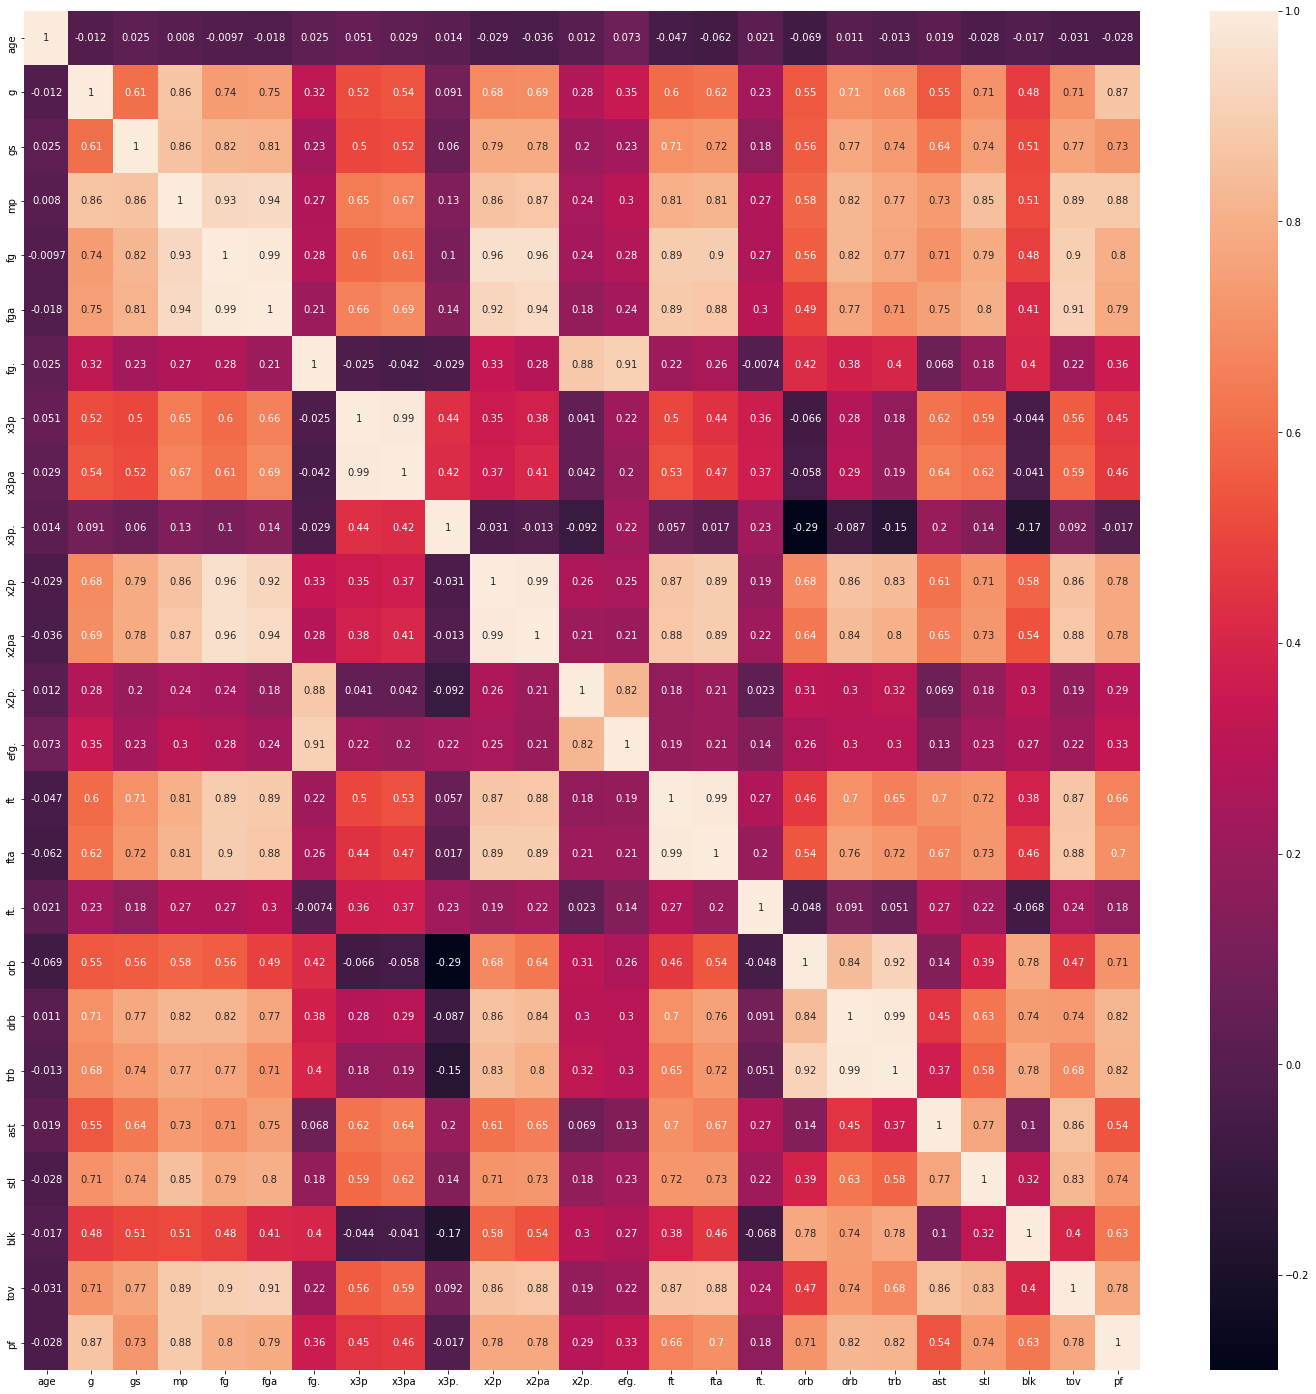

In [46]:
# Plotting correlation plot
import seaborn as sns
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True)

In [47]:
# Selecting only 10 most important features
X = X[feat_importances.nlargest(10).index.values]

In [48]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [49]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [50]:
# let's fit the data into kNN model and see how well it performs:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [51]:
# Let's predict on test set
y_pred = knn.predict(x_test)

In [52]:
knn.score(x_train,y_train) 

0.9848686324579018

In [53]:
knn.score(x_test,y_test)  # getting decent accuracy on test set

0.9766163568458329

In [54]:
#create a function to create adjusted R-squared
def adj_r2(x,y):
    r2 = knn.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [55]:
print(adj_r2(x_test,y_test))

0.974490571104545


R2 adj_R2 is almost same, so model feature selection is ok.

In [56]:
# Let's do some hyperparameter tuning and see if we get more accuracy
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [57]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [31]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.955, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.964, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.974, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.979, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.975, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.943, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.975, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.943, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.973, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.983, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.980, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.970, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.984, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.977, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=7, score=0.970, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.977, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.983, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.977, total= 

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.926, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.977, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.982, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.975, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=10, score=0.969, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=11, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=11, score=0.979, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=7, score=0.970, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, score=0.977, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, score=0.983, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, score=0.977, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, score=0.969, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, score=0.926, total=   0.0s
[CV] a

[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.934, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.976, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.984, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.977, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.970, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.930, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=9, score=0.977, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.968, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.922, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.974, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.979, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.975, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.968, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.955, total=   0.0s
[CV] algorithm=

[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.983, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.977, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, score=0.969, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.926, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.977, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.982, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.975, total=   0.0s
[CV] algorithm=br

[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.974, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.979, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.975, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.968, total=   0.0s


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    2.5s finished


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [32]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_


{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [33]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors = 5)

In [34]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=18)

In [35]:
knn.score(x_train,y_train)

0.9809382681809636

In [36]:
knn.score(x_test,y_test)

0.9740729394507177

We are getting almost same score after tuning, now save the model and ready for deployment

In [37]:
# let's save the model
import pickle

with open('C:/Users/SHAKEB/Ineuron Assignments/KNN/modelForPrediction.sav', 'wb') as f:
    pickle.dump(knn,f)
    
with open('C:/Users/SHAKEB/Ineuron Assignments/KNN/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)